# 6.0: Decision Trees and Ensemble Learning

## 6.1 [Credit risk scoring project](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/06-trees/01-credit-risk.md)

### Credit Risk Scoring
* Build a model, that the bank can use to take a decision on whether they give a credit or not
* The model gives the risk, that a customer won't pay back the credit ("Risk of Defaulting")

Source https://github.com/gastonstat/CreditScoring

To download the dataset, run

https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

    "This week we'll focus on a credit risk scoring model. For example if a customer wants to borrow money from a bank, the bank can decide whether to lend the money or not based on some information. The model predicts a risk that a customer would default on their loan.\n",
    "\n",
    "The model is trained on historical data on people who got a loan and defaulted or not. The model is a binary classification model, similar to last week's customer churn model.\n",
    "\n",
    "$$\n",
    "y_i \\in \\{0, 1\\}\n",
    "$$\n",
    "\n",
    "0 means the customer did not default, 1 means the customer did default."

"This week we'll focus on a credit risk scoring model. For example if a customer wants to borrow money from a bank, the bank can decide whether to lend the money or not based on some information. The model predicts a risk that a customer would default on their loan.\n",
    "\n",
    "The model is trained on historical data on people who got a loan and defaulted or not. The model is a binary classification model, similar to last week's customer churn model.\n",
    "\n",
    "$$\n",
    "y_i \\in \\{0, 1\\}\n",
    "$$\n",
    "0 means the customer did not default, 1 means the customer did default."

## Set Up

In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 [Data cleaning and preparation](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/06-trees/02-data-prep.md)

* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [13]:
df = pd.read_csv(r"C:\Users\pc\Downloads\CreditScoring.csv")

df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [15]:
df.describe

<bound method NDFrame.describe of       Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
0          1          9     1    60   30        2        1    3        73   
1          1         17     1    60   58        3        1    1        48   
2          2         10     2    36   46        2        2    3        90   
3          1          0     1    60   24        1        1    1        63   
4          1          0     1    36   26        1        1    1        46   
...      ...        ...   ...   ...  ...      ...      ...  ...       ...   
4450       2          1     1    60   39        2        1    1        69   
4451       1         22     2    60   46        2        1    1        60   
4452       2          0     2    24   37        2        1    2        60   
4453       1          0     1    48   23        1        1    3        49   
4454       1          5     2    60   32        2        1    3        60   

      Income  Assets  Debt  Amount  Price

In [16]:
df.info

<bound method DataFrame.info of       Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
0          1          9     1    60   30        2        1    3        73   
1          1         17     1    60   58        3        1    1        48   
2          2         10     2    36   46        2        2    3        90   
3          1          0     1    60   24        1        1    1        63   
4          1          0     1    36   26        1        1    1        46   
...      ...        ...   ...   ...  ...      ...      ...  ...       ...   
4450       2          1     1    60   39        2        1    1        69   
4451       1         22     2    60   46        2        1    1        60   
4452       2          0     2    24   37        2        1    2        60   
4453       1          0     1    48   23        1        1    3        49   
4454       1          5     2    60   32        2        1    3        60   

      Income  Assets  Debt  Amount  Price  

In [18]:
!head CreditScoring.csv


"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [19]:
# Display the first 5 rows
df.head()


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [20]:
# First we'll lower case the columns:

df.columns = df.columns.str.lower()

Next, we'll substitute the numerical values to string, such that we know what the different categories are instead of seeing numbers. To this end we use `df.map` which takes in a mapping dictionary as argument:

In [21]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
 
marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
 
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
 
job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

df.records = df.records.map(records_values)
df.marital = df.marital.map(marital_values)
df.home = df.home.map(home_values)
df.job = df.job.map(job_values)
 
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,1,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,1,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4454 non-null   int64  
 1   seniority  4454 non-null   int64  
 2   home       4454 non-null   object 
 3   time       4454 non-null   int64  
 4   age        4454 non-null   int64  
 5   marital    4454 non-null   object 
 6   records    4454 non-null   object 
 7   job        4454 non-null   object 
 8   expenses   4454 non-null   int64  
 9   income     4420 non-null   float64
 10  assets     4407 non-null   float64
 11  debt       4436 non-null   float64
 12  amount     4454 non-null   int64  
 13  price      4454 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 487.3+ KB


In [22]:
df.describe().round()

,status,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


income, assets, and debt have very large values. These are actually missing values. We will replace them by `np.nan`:

In [24]:
import numpy as np

for c in ["income", "assets", "debt"]:
    df.loc[df[c]==99999999, c] = np.nan

df[["income", "assets", "debt"]].max()

income       959.0
assets    300000.0
debt       30000.0
dtype: float64

We have one sample with unknown status. We will just drop it:

In [25]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [26]:
df = df[df["status"]!=0].reset_index(drop=True)

Also, we'll change the encoding. 2 means the customer defaulted so it should become 1:

In [27]:
df.status = (df.status==2).astype(int)

In [28]:
df.status.value_counts()

status
0    3200
1    1254
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [30]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [31]:
df_train.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,0,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,0,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


Let's define y:

In [32]:
y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values

Let's drop the target variable from our dataframes:

In [33]:
del df_train["status"]
del df_val["status"]
del df_test["status"]

Now we are ready to train a model.

## 6.3 Decision trees

Decision tree consists of conditions based on which an outcome is predicted. See example below. It's a bunch of if-then-else rules.

This is an example. If we were to write this in code, it would be:

In [34]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "parttime":
            return "default"
        else:
            return "ok"
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

Let's use this decision tree on the first record in df_train:

In [37]:
xi = df_train.iloc[0].to_dict()

assess_risk(xi)

# y_train[0]

'ok'

Although we encoded a set of rules in the decision tree above, we can also learn the if-then-else rules using sklearn:

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [39]:
train_dicts = df_train.fillna(0).to_dict(orient="records")

In [40]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.6653205298975564

It's not great. Let's check it for our training dataset:

In [43]:
y_pred = dt.predict_proba(X_train)[:, 1]

roc_auc_score(y_train, y_pred)

1.0

The AUC score on the training dataset is perfect, whereas on the validation dataset it's poor. Whatever the model learned on the training dataset, does not translate well to unseen data in the validation dataset. This is called **overfitting**.

What happens is that the model creates a rule for each customer in the training dataset. But this pattern is not true in general. Our model is said to have low bias and high variance. Right now we have not restricted the depth of the decision tree. What this means is that it can create as many conditionals as it wants to fit the data. We end up with overly specific rules which are reprenting the individual samples in the training set, rather then representing any general mechanisms. What we can do is to constrain the decision tree depth. This will give us rules that are less specific.

In [44]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.7761016984958594

In [46]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7389079944782155

We can see that with a `max_depth` of 3, we have better performance on the validation dataset and it is in line with the training dataset as well, suggesting whatever we learned from the training datset, generalizes to unseen data.

We can visualize the rules that our model came up with by visualizing the decision tree:

In [47]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.feature_names_))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



## 6.4 Decision tree learning algorithm


How does a decision tree come up with rules? Let's look at this example dataset:

In [48]:
data = [
    [8000, "default"],
    [2000, "default"],
    [0, "default"],
    [5000, "ok"],
    [5000, "ok"],
    [4000, "ok"],
    [9000, "ok"],
    [3000, "default"],
]

df_example = pd.DataFrame(data, columns=["assets", "status"])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


We will train a decision tree to split based on this data.

In [49]:
df_example.sort_values("assets")

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [50]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [51]:
for T in Ts:
    df_right = df_example[df_example.assets > T]
    df_left = df_example[df_example.assets <= T]
    display(df_left)
    display(df_right)
    print(t)

,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


NameError: name 't' is not defined

Based on different thresholds, we have various splits. We can for example decide on a rule based on majority. Let's take T=4000.

In [52]:
T = 4000
df_right = df_example[df_example.assets > T]
df_left = df_example[df_example.assets <= T]
display(df_left)
display(df_right)

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


We can see above that `df_left` mostly has status default, whereas `df_right` mostly has status ok. Let's take a look at the misclassification rate as a metric:

In [53]:
(df_right.status != df_right.status.mode()[0]).mean()

np.float64(0.25)

In [54]:
(df_left.status != df_left.status.mode()[0]).mean()


np.float64(0.25)

Taking a weighted average of these, yields:

In [55]:
(len(df_right) * (df_right.status != df_right.status.mode()[0]).mean() + len(df_left) * (df_left.status != df_left.status.mode()[0]).mean()) / len(df_example)

np.float64(0.25)

The misclassification rate is a measure of **impurity**.

In [56]:
table = [("T", "decision left", "impurity left", "decision right", "impurity right", "average")]
for T in Ts:
    df_right = df_example[df_example.assets > T]
    df_left = df_example[df_example.assets <= T]
    table.append(
        (T,
        df_left.status.mode()[0],
        (df_left.status != df_left.status.mode()[0]).mean().round(2),
        df_right.status.mode()[0],
        (df_right.status != df_right.status.mode()[0]).mean().round(2),
        ((df_left.status != df_left.status.mode()[0]).mean().round(2)*len(df_left) + (df_right.status != df_right.status.mode()[0]).mean().round(2)*len(df_right))/(len(df_example)),
    )) 
pd.DataFrame(table[1:], columns=table[0])

,T,decision left,impurity left,decision right,impurity right,average
0,0,default,0.00,ok,0.43,0.37625
1,2000,default,0.00,ok,0.33,0.24750
2,3000,default,0.00,ok,0.20,0.12500
3,4000,default,0.25,ok,0.25,0.25000
4,5000,default,0.50,default,0.50,0.50000
5,8000,default,0.43,ok,0.00,0.37625


The best split is for T=3000, since it has the lowest weighted average impurity.

We will now add a second feature:

In [58]:
data = [
    [8000, 3000, "default"],
    [2000, 1000, "default"],
    [0, 1000, "default"],
    [5000, 1000, "ok"],
    [5000, 1000, "ok"],
    [4000, 1000, "ok"],
    [9000, 500, "ok"],
    [3000, 2000, "default"],
]

df_example = pd.DataFrame(data, columns=["assets", "debt", "status"])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [59]:
df_example.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [60]:
thresholds = {
    "assets": [0, 2000, 3000, 4000, 5000, 8000],
    "debt": [500, 1000, 2000],
}

table = [("feature", "T", "decision left", "impurity left", "decision right", "impurity right", "average")]

for feature, Ts in thresholds.items():
    # print(feature)
    for T in Ts:
        # print("#################")
        # print(feature, T)
        
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
        
        # display(df_left)
        # print(df_left.status.value_counts(normalize=True))
        
        # display(df_right)
        # print(df_right.status.value_counts(normalize=True))

        table.append(
            (
                feature,
                T,
                df_left.status.mode()[0],
                (df_left.status != df_left.status.mode()[0]).mean().round(2),
                df_right.status.mode()[0],
                (df_right.status != df_right.status.mode()[0]).mean().round(2),
                ((df_left.status != df_left.status.mode()[0]).mean().round(2)*len(df_left) + (df_right.status != df_right.status.mode()[0]).mean().round(2)*len(df_right))/(len(df_example)),
            )
        ) 
pd.DataFrame(table[1:], columns=table[0])

,feature,T,decision left,impurity left,decision right,impurity right,average
0,assets,0,default,0.00,ok,0.43,0.37625
1,assets,2000,default,0.00,ok,0.33,0.24750
2,assets,3000,default,0.00,ok,0.20,0.12500
3,assets,4000,default,0.25,ok,0.25,0.25000
4,assets,5000,default,0.50,default,0.50,0.50000
5,assets,8000,default,0.43,ok,0.00,0.37625
6,debt,500,ok,0.00,default,0.43,0.37625
7,debt,1000,ok,0.33,default,0.00,0.24750
8,debt,2000,ok,0.43,default,0.00,0.37625


What we can see here is that the feature assets with a weighted average of impurity of 12.5% is the best choice.

If we'd have to summarize the decision tree algorithm it's as follows:

for f in features:
    find all thresholds for f
        for t in thresholds
            split dataset using f>t
                compute impurity of this split
select condition with lowest impurity

We can split recursively. But if we split too much, we risk overfitting to the dataset. We need to know when to stop splitting. There are some stopping criteria:

- group is already pure
- decision tree reaches `max_depth`
- group too small to split

## 6.5 Decision trees parameter tuning

We want to find parameters `max_depth` and `min_samples_leaf` such that AUC is maximized. Let's start by iterating tree depth:

In [62]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print(f"{d:4} -> {auc:.3f}") if d is not None else print(f"{d} -> {auc:.3f}")

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.757
  10 -> 0.695
  15 -> 0.659
  20 -> 0.676
None -> 0.662


The best AUC score is for `max_depth` of 4, 5, and 6. Although 5 is the best, it's a close call. We have a preference for as little model complexity as possible, therefore we would go with 4. However, we have another parameter to iterate over, `min_samples_leaf`:

In [63]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

df_scores = pd.DataFrame(data=scores, columns=["max_depth", "min_samples_leaf", "auc"]).sort_values("auc", ascending=False)

<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

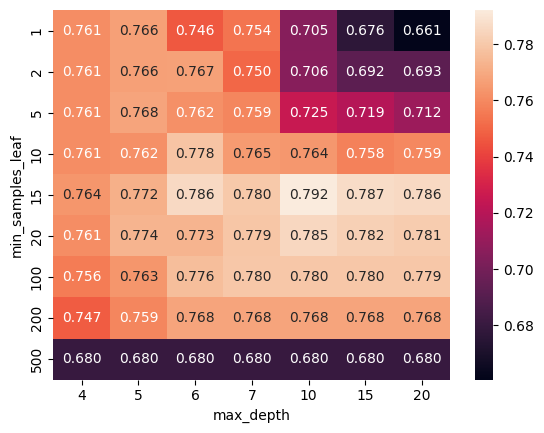

In [65]:
import seaborn as sns


sns.heatmap(df_scores.pivot(index="min_samples_leaf", columns="max_depth", values="auc"), annot=True, fmt=".3f" )

In [66]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 6.6 Ensemble learning and random forest


We will use Random Forest to put multiple decision trees together. We could have multiple models, each of which makes a prediction. Then we do a majority vote or average prediction of models. However, the decision trees are not identical (there would be no point in having multiple models if that were the case). Instead, each model is trained with a subset of n features (selected randomly, with replacement). Hence the naming **Random Forest**.

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [71]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

This is about as good as our decision tree classifier, but we didn't have to tune our random forest model.

In [72]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

Now, let's try out different number of estimators:

In [73]:
scores = []
for n in range(10, 200, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    scores.append((n, roc_auc_score(y_val, y_pred)))

In [74]:
df_scores = pd.DataFrame(data=scores, columns=["n_estimators", "auc"])

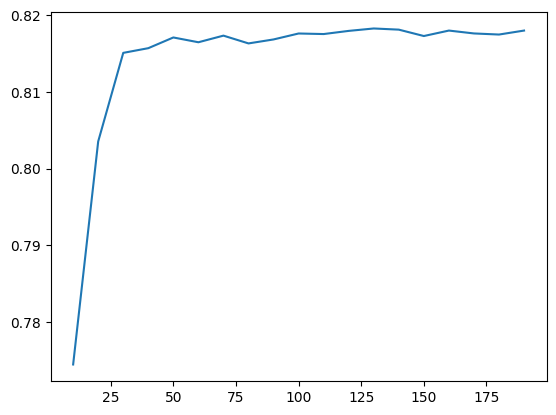

In [75]:
plt.plot(df_scores.n_estimators, df_scores.auc)

After about 50 trees, there is no point in increasing estimators.

We can now tune `max_depth` and `min_samples_leaf`.

In [76]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 200, 10):
        rf = RandomForestClassifier(
            max_depth=d, 
            # min_samples_leaf=s, 
            n_estimators=n, 
            random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, n, auc))

df_scores = pd.DataFrame(data=scores, columns=["max_depth", "n_estimators", "auc"])

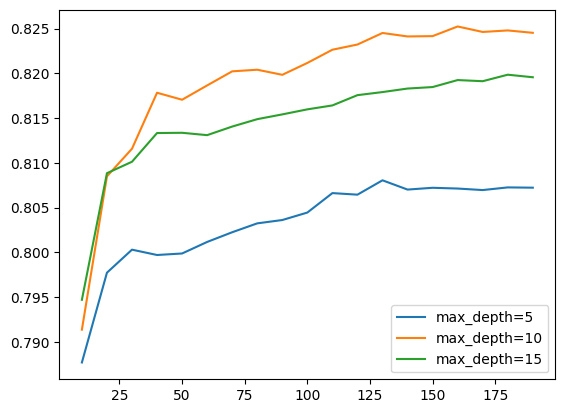

In [77]:
import matplotlib.pyplot as plt

for d in [5, 10, 15]:
    plt.plot(df_scores[df_scores.max_depth==d].n_estimators, df_scores[df_scores.max_depth==d].auc, label=f"max_depth={d}")
plt.legend()

`max_depth` of `10` performs the best after about `125` estimators. Now let's check `min_samples_leaf` in the same way.

In [78]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            max_depth=10, 
            min_samples_leaf=s, 
            n_estimators=n, 
            random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((s, n, auc))

df_scores = pd.DataFrame(data=scores, columns=["min_samples_leaf", "n_estimators", "auc"])

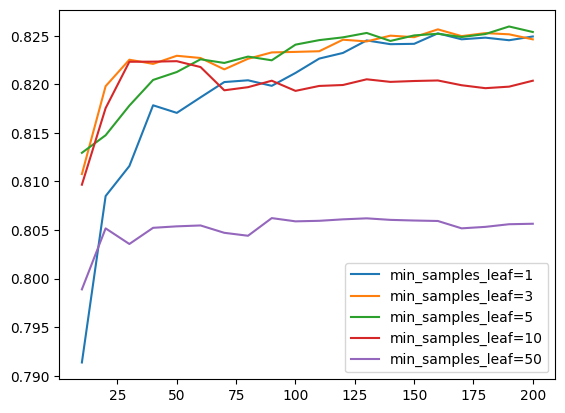

In [79]:
import matplotlib.pyplot as plt

for s in [1, 3, 5, 10, 50]:
    plt.plot(df_scores[df_scores.min_samples_leaf==s].n_estimators, df_scores[df_scores.min_samples_leaf==s].auc, label=f"min_samples_leaf={s}")
plt.legend()

Best min_samples_leaf are `1` and `3`

In [81]:
rf = RandomForestClassifier(
            max_depth=10, 
            min_samples_leaf=3, 
            n_estimators=100,
            random_state=1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

The parameters `max_depth` and `min_samples_leaf` are not the only ones we can train. Other ones:

- `max_features`: how many features will each decision tree be trained with?
- `bootstrap`: with this we can randomize samples, just as we did with features.
    
Also we can use `n_jobs`. **This is the number of jobs we can run in parallel by setting it to -1**.

## 6.7 Gradient boosting and XGBoost

Instead of training models in parallel, we can train them sequentially, where each model learns from the previous one. This is called **boosting**. One particular way of boosting is called **gradient boosting**.

In Random Forest, train a dataset on multiple decision trees. These are independent from each other.

In Boosting, we train a model, make predictions, compute errors, then we train another model which **aims to correct the errors**. We do this multiple times.

There is a library called **XGBoost** which we can use for this.

In [82]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.9 MB/s eta 0:00:39
   ---------------------------------------- 0.8/72.0 MB 2.4 MB/s eta 0:00:30
    --------------------------------------- 1.0/72.0 MB 1.4 MB/s eta 0:00:51
   - -------------------------------------- 1.8/72.0 MB 1.9 MB/s eta 0:00:37
   - -------------------------------------- 2.1/72.0 MB 2.0 MB/s eta 0:00:36
   - -------------------------------------- 2.1/72.0 MB 2.0 MB/s eta 0:00:36
   - -------------------------------------- 2.1/72.0 MB 2.0 MB/s eta 0:00:36
   - -------------------------------------- 2.1/72.0 MB 2.0 MB/s eta 0:00:36
   - -------------------------------------- 2.1/72.0 MB 2.0 MB/s eta 0:00:36
   - -------------------------------------- 2.1/72.0 MB 2.0 MB/s eta 0:00:36
   - ---------------

In [ ]:
features = dv.feature_names_

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [84]:
import xgboost as xgb

In [86]:
features = dv.feature_names_

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [87]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [88]:
y_pred = model.predict(dval)

In [89]:
roc_auc_score(y_val, y_pred)

0.8060200770143614

In [90]:
%%capture output

watchlist = [(dtrain, "train"), (dval, "val")]

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

In [91]:
print(output)

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	train-auc:0.98248	val-auc:0.81520
[30]	train-auc:0.98844	val-auc:0.81613
[35]	train-auc:0.99244	val-auc:0.81453
[40]	train-auc:0.99393	val-auc:0.81407
[45]	train-auc:0.99568	val-auc:0.81392
[50]	train-auc:0.99723	val-auc:0.81276
[55]	train-auc:0.99804	val-auc:0.81299
[60]	train-auc:0.99861	val-auc:0.81244
[65]	train-auc:0.99916	val-auc:0.81197
[70]	train-auc:0.99962	val-auc:0.81243
[75]	train-auc:0.99975	val-auc:0.81152
[80]	train-auc:0.99989	val-auc:0.81359
[85]	train-auc:0.99993	val-auc:0.81193
[90]	train-auc:0.99998	val-auc:0.81038
[95]	train-auc:0.99999	val-auc:0.80871
[100]	train-auc:0.99999	val-auc:0.80842
[105]	train-auc:1.00000	val-auc:0.80778
[110]	train-auc:1.00000	val-auc:0.80764
[115]	train-auc:1.00000	val-auc:0.80722
[120]	train-auc:1.00000	val-auc:0.80750
[125]	train-auc:1.0000

In [93]:
def parse_xgb_output(output):
    return (
        pd.DataFrame([line.split("\t") for line in output.stdout.split("\n")][:-1])
        .assign(
            num_iter=lambda df_: df_[0].str.strip("[]"),
            train_auc=lambda df_: df_[1].str.split(":", expand=True)[1],
            val_auc=lambda df_: df_[2].str.split(":", expand=True)[1],
        )
        .astype({
            "num_iter": int,
            "train_auc": float,
            "val_auc": float,
        })
        .drop(columns=[0, 1, 2])
    )

df_score = parse_xgb_output(output)

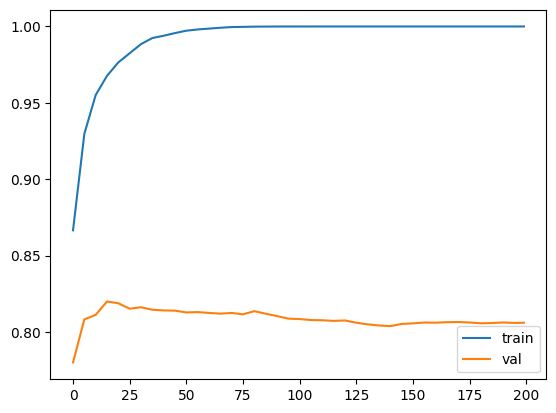

In [94]:
plt.plot(df_score.num_iter, df_score.train_auc, label="train")
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

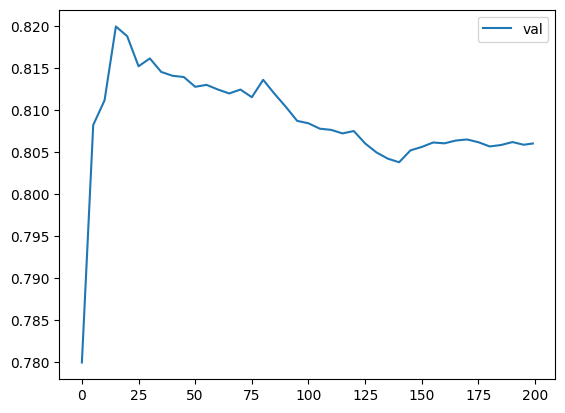

In [95]:
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

Here we see that validation score goes down after 25 iterations. We are overfitting.

In [97]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [98]:
y_pred = model.predict(dval)


In [99]:
roc_auc_score(y_val, y_pred)


0.8060200770143614

In [100]:
%%capture output

watchlist = [(dtrain, "train"), (dval, "val")]

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

In [101]:
print(output)

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	train-auc:0.98248	val-auc:0.81520
[30]	train-auc:0.98844	val-auc:0.81613
[35]	train-auc:0.99244	val-auc:0.81453
[40]	train-auc:0.99393	val-auc:0.81407
[45]	train-auc:0.99568	val-auc:0.81392
[50]	train-auc:0.99723	val-auc:0.81276
[55]	train-auc:0.99804	val-auc:0.81299
[60]	train-auc:0.99861	val-auc:0.81244
[65]	train-auc:0.99916	val-auc:0.81197
[70]	train-auc:0.99962	val-auc:0.81243
[75]	train-auc:0.99975	val-auc:0.81152
[80]	train-auc:0.99989	val-auc:0.81359
[85]	train-auc:0.99993	val-auc:0.81193
[90]	train-auc:0.99998	val-auc:0.81038
[95]	train-auc:0.99999	val-auc:0.80871
[100]	train-auc:0.99999	val-auc:0.80842
[105]	train-auc:1.00000	val-auc:0.80778
[110]	train-auc:1.00000	val-auc:0.80764
[115]	train-auc:1.00000	val-auc:0.80722
[120]	train-auc:1.00000	val-auc:0.80750
[125]	train-auc:1.0000

In [102]:
def parse_xgb_output(output):
    return (
        pd.DataFrame([line.split("\t") for line in output.stdout.split("\n")][:-1])
        .assign(
            num_iter=lambda df_: df_[0].str.strip("[]"),
            train_auc=lambda df_: df_[1].str.split(":", expand=True)[1],
            val_auc=lambda df_: df_[2].str.split(":", expand=True)[1],
        )
        .astype({
            "num_iter": int,
            "train_auc": float,
            "val_auc": float,
        })
        .drop(columns=[0, 1, 2])
    )

df_score = parse_xgb_output(output)

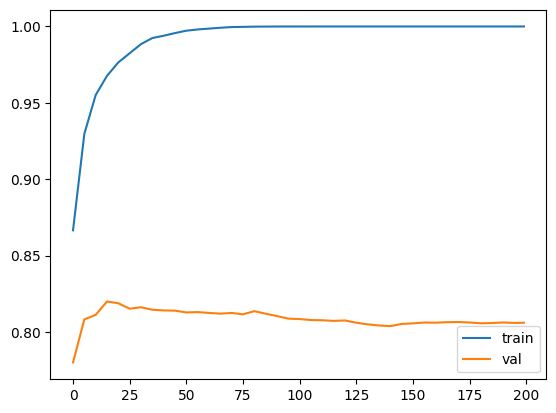

In [103]:
plt.plot(df_score.num_iter, df_score.train_auc, label="train")
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

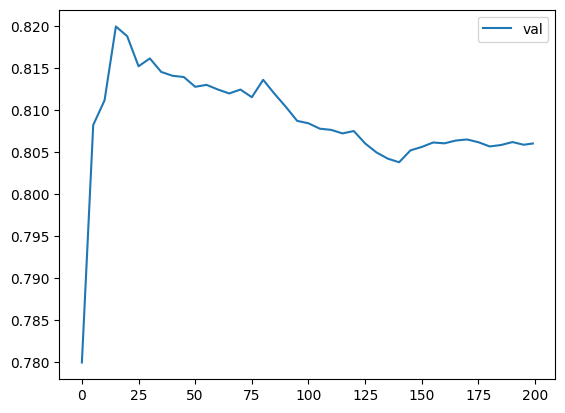

In [104]:
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

Here we see that validation score goes `down` after `25` iterations. We are overfitting.

## 6.8 XGBoost parameter tuning

This lesson we will tune our XGBoost model by tuning parameters `eta (learning rate)`, `max_depth`, and `min_child_weight`.

In [107]:
%%capture output

watchlist = [(dtrain, "train"), (dval, "val")]

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

In [108]:
scores = {}

In [109]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,

    "objective": "binary:logistic",
    "eval_metric": "auc",

    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175, evals=watchlist, verbose_eval=5)

In [110]:
df_score = parse_xgb_output(output)
scores[f'min_child_weight={xgb_params["min_child_weight"]}'] = df_score

(0.8, 0.84)

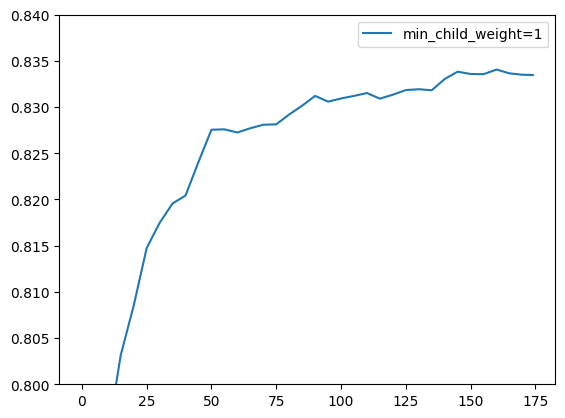

In [111]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.8, 0.84)

`eta=0.1` needs too many rounds and is still improving. `eta=1.0` improves rapidly, but quickly starts to overfit. eta=0.3` is at the sweet spot.

`max_depth=3` is the best.

`min_child_weight` has almost negligible effect, so we'll go with default of 1.

Below is our final model.

In [115]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,

    "objective": "binary:logistic",
    "eval_metric": "auc",

    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Some other useful `parameters`:

- `colsample_bytree`: similar to max_features in random forest (each tree gets subset of features)
- `subsample`: similar to bootstrap in random forest (each tree is trained with subset of rows)
- `lambda` and `alpha`

## 6.9 Selecting the best model

So far we've trained `three` different **tree-based models**:

- **Decision tree**
- **Random Forest**
- **XGBoost**

We will evaluate them on the **evaluation (test) data** and select the best model.

In [116]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7856948245380349

In [117]:
rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            min_samples_leaf=3, 
            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [118]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,

    "objective": "binary:logistic",
    "eval_metric": "auc",

    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8334715797631446

In [119]:
y_full_train = df_full_train.status.values

del df_full_train["status"] 
dicts_full_train = df_full_train.to_dict(orient="records")
X_full_train = dv.transform(dicts_full_train)

dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

In [120]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,

    "objective": "binary:logistic",
    "eval_metric": "auc",

    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dfull_train, num_boost_round=175)

y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8299814280826938

#### Our model generalized well to unseen data. XGBoost performed the best.

### **`Notes`**

- Decision trees learn `if-then-else` rules from data.
- Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
- Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions.
- Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. X
- GBoost is an implementation of gradient boosting.

## 6.10 Explore more

* for this dataset we didn't do **EDA** or **feature engineering**. You can do it to get more **insights** into the problem.
* For **random forest**, there are more **parameters** that we can **tune**. Check **max_features** and **bootstrap**.
* There's a **variation of random forest** called **"extremely randomized trees"**, or "extra trees". Instead of selecting the best split among all possible **thresholds**, it selects a few thresholds randomly and **picks the best** one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in **ExtraTreesClassifier**. Try it for this project.
* XGBoost can deal with **NAs** - we don't have to do **fillna** for it. Check if not **filling NA's help improve performance**.
* Experiment with other **XGBoost parameters: subsample and colsample_bytree**.
* When selecting the **best split**, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for random forest (it's the same for plain decision trees) and for xgboost
* Trees can also be used for **solving the regression problems**: **check DecisionTreeRegressor, RandomForestRegressor and the objective=reg:squarederror parameter for XGBoost**.